# Data Storytelling

A variable dictionary can be found at https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier

The output variable I am interested in is one's ability to handle an unexpected financial expense. Originally a 5-point ordinal variable, I encoded it as a Boolean variable 'target' that is True if the response was 4 or 5, indicating high confidence in one's ability to handle unexpected expenses. 

In [3]:
#Create dataframe df containing data and 'target' column 
df = pd.read_csv('NFWBS_PUF_2016_data.csv')
#True corresponds to confidence in ability to handle an unexpected financial expense
df['target'] = df['FWB1_1'] > 3

Because there were so many features in this data set (217, to be exact), I decided to use a random forest to act as an initial screen for what variables I would be exploring. I then selected what variables would be interesting to look at regarding their relationship to dealing with unexpected payments and costs.

In [4]:
#Remove columns containing financial well being scores and other irrelevant columns
fwb_cols = [col for col in df if col.startswith('FWB')]
swb_cols = [col for col in df if col.startswith('SWB')]
dfx = df.drop(fwb_cols + swb_cols + ['PUF_ID', 'finalwt', 'FSscore', 'target'], axis=1)

#Use a random forest to identify possible top features
X = dfx.values
y = df['FWB1_1'].values

rfc = RandomForestClassifier()
rfc.fit(X, y)
idx = np.argsort(rfc.feature_importances_)[::-1]
dfx.columns[idx][:15]

Index(['ENDSMEET', 'SAVINGSRANGES', 'ABSORBSHOCK', 'MANAGE1_3', 'SAVEHABIT',
       'ACT1_2', 'FS1_7', 'PPINCIMP', 'CONNECT', 'FS1_4', 'MANAGE1_2',
       'LIFEEXPECT', 'FS1_5', 'PPREG9', 'SCFHORIZON'],
      dtype='object')

We can see from the output above that some of the variables heavily associated with our target variable are the ability to raise $2,000 in 30 days, the difficulty of covering monthly expenses, the frequency of paying off one's monthly credit card balance, and following through on one's financial intentions.

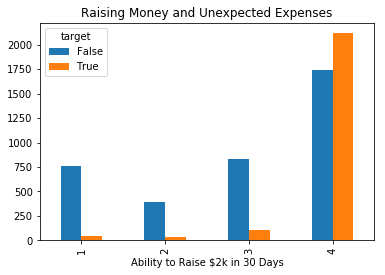

In [5]:
#Remove rows where response was 8 (corresponding to 'I don't know') or -1 (no response)
dfabsorb = df[(df['ABSORBSHOCK'] != 8) & (df['ABSORBSHOCK'] != -1)]
absorb_tab = pd.crosstab(dfabsorb['ABSORBSHOCK'], dfabsorb['target'])
absorb_tab.plot.bar()
plt.title('Raising Money and Unexpected Expenses')
plt.xlabel('Ability to Raise $2k in 30 Days')
plt.show()

We can see that people's relative confidence in handling unexpected expenses is roughly the same from being certain they couldn't raise the money to probaly being sure they could, but being certain they could raise the money causes a reversal in this relative confidence.

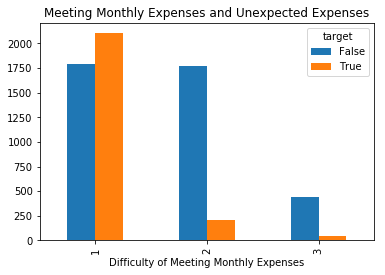

In [6]:
#Remove rows where response was -1 (no response)
dfends = df[df['ENDSMEET'] != -1]
endsmeet_tab = pd.crosstab(dfends['ENDSMEET'], dfends['target'])
endsmeet_tab.plot.bar()
plt.title('Meeting Monthly Expenses and Unexpected Expenses')
plt.xlabel('Difficulty of Meeting Monthly Expenses')
plt.show()

As expected, finding it easy to pay off monthly expenses is a huge benefit to dealing with unexpected expenses.

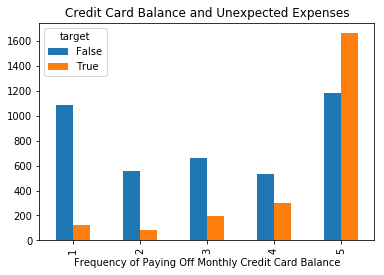

In [7]:
#Remove rows with no response
dfmanage = df[df['MANAGE1_3'] != -1]
manage_tab = pd.crosstab(dfmanage['MANAGE1_3'], dfmanage['target'])
manage_tab.plot.bar()
plt.title('Credit Card Balance and Unexpected Expenses')
plt.xlabel('Frequency of Paying Off Monthly Credit Card Balance')
plt.show()

We can see that always paying off your full credit card balance at the end of the month provides a huge and immediately noticeable spike in one's confidence in dealing with unexpected costs. What's interesting is that never doing so up to doing so often seem to have similar effects on our target variable (looking at only instances where the target variable is True).

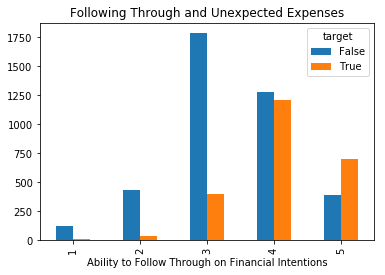

In [14]:
#Remove rows with no response
dfadvice = df[df['FS1_1'] != -1]
intentions_tab = pd.crosstab(dfadvice['FS1_1'], dfadvice['target'])
intentions_tab.plot.bar()
plt.title('Following Through and Unexpected Expenses')
plt.xlabel('Ability to Follow Through on Financial Intentions')
plt.show()

The preferred level of confidence in one's ability to follow through on one's financial intentions seems to be just below extremely confident when looking at the absolute numbers, although relatively speaking absolute confidence also seems to have some benefit. This could be an interesting concept to explore.